In [1]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.metrics import calinski_harabasz_score

from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams



from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

In [18]:
columns = ['algorithm', 'number_of_clusters', 'Silhouette_Score', 'davies_bouldin_score', 'calinski_harabasz_score']


clustering_results_df = pd.DataFrame(columns=columns)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score


In [2]:
cdf = pd.read_excel('imputed_d_xgbf_1000iteration.xlsx').drop(
    ['Extrusion_Rate_Lengthwise_(mm/s)', 'Extrusion_Rate_Volume-wise_(mL/s)', 'chamber Temperature  (°C)',
    'Printability','Cell Response','Scaffold Quality (P*C)'], axis=1)
cdf['Cell_Density_(cells/mL)'] = cdf['Cell_Density_(cells/mL)'] / 1e6

In [20]:
cdf

,Alginate (%w/v),PVA-HA (%w/v),CaSO4 (%w/v),Na2HPO4 (%w/v),Gelatin (%w/v),GelMA (%w/v),laponite (%w/v),graphene oxide (%w/v),hydroxyapatite (%w/v),Hyaluronic_Acid (%w/v),...,PBS (M),Cell Type,Cell_Density_(cells/mL),Physical_Crosslinking_Durantion_(s),Photocrosslinking_Duration_(s),Extrusion_Pressure (kPa),Nozzle_Movement_Speed_(mm/s),Nozzle_Diameter_(µm),Syringe_Temperature_(°C),Substrate_Temperature_(°C)
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,35,0.25,0.0,0,200.0,15.000000,210.0,22.0,22.000000
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,35,0.25,0.0,0,200.0,15.000000,210.0,22.0,22.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,35,0.25,0.0,0,200.0,15.000000,210.0,4.0,22.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,35,0.25,0.0,0,200.0,15.000000,210.0,4.0,22.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,35,0.25,0.0,0,20.0,15.000000,610.0,4.0,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.5,70,0.0,...,0.0,24,0.00,86400.0,0,350.0,5.112460,510.0,45.0,18.384745
1167,0.0,0.0,0.0,0.0,20.0,0.0,0.0,1.0,70,0.0,...,0.0,24,0.00,86400.0,0,350.0,2.140077,510.0,47.5,15.247169
1168,0.0,0.0,0.0,0.0,20.0,0.0,0.0,1.0,70,0.0,...,0.0,24,0.00,86400.0,0,350.0,2.929181,510.0,47.5,15.496053
1169,0.0,0.0,0.0,0.0,20.0,0.0,0.0,1.0,70,0.0,...,0.0,24,0.00,86400.0,0,350.0,2.660497,510.0,47.5,15.576830


In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cdf)

In [4]:
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'

In [5]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=100000, random_state=42)
tsne_results = tsne.fit_transform(df_scaled)

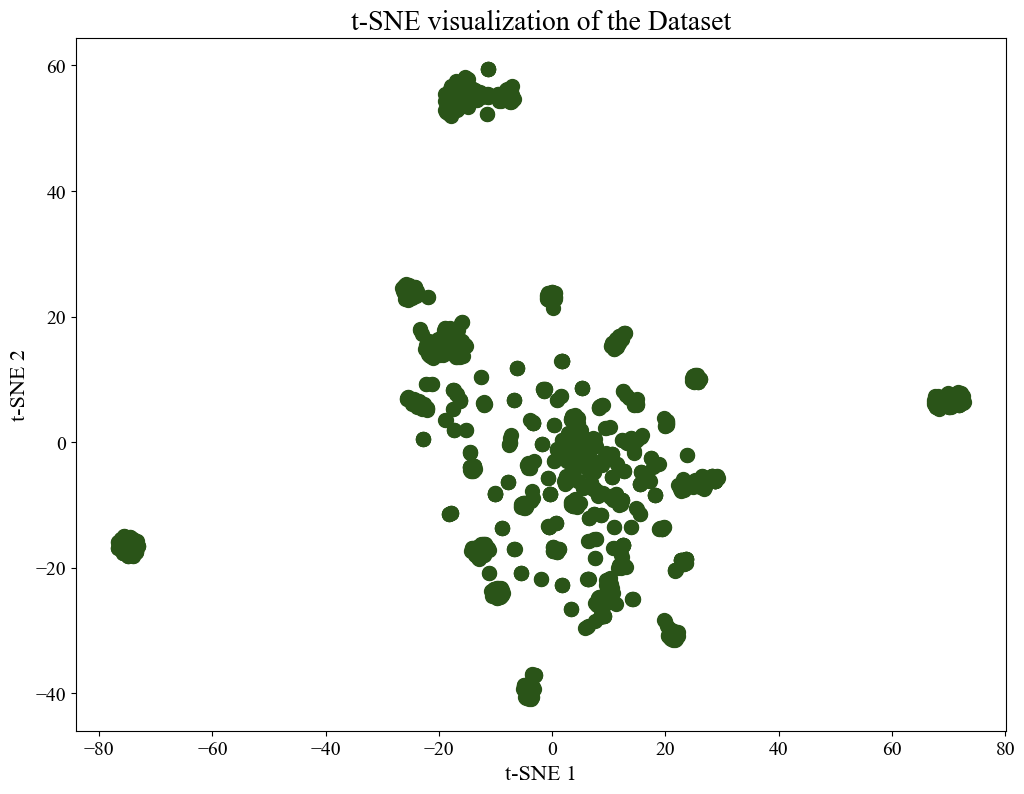

In [6]:
plt.figure(figsize=(12, 9))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=100, color='#2a5418')
plt.title('t-SNE visualization of the Dataset', fontsize=20)
plt.xlabel('t-SNE 1', fontsize=16)  
plt.ylabel('t-SNE 2', fontsize=16)  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [40]:
tsne_results

array([[ 1.4912994,  7.3015604],
       [ 1.4912994,  7.3015604],
       [ 1.6693246, 12.933006 ],
       ...,
       [71.60484  ,  7.319922 ],
       [72.32816  ,  7.3352675],
       [71.68591  ,  7.084532 ]], dtype=float32)

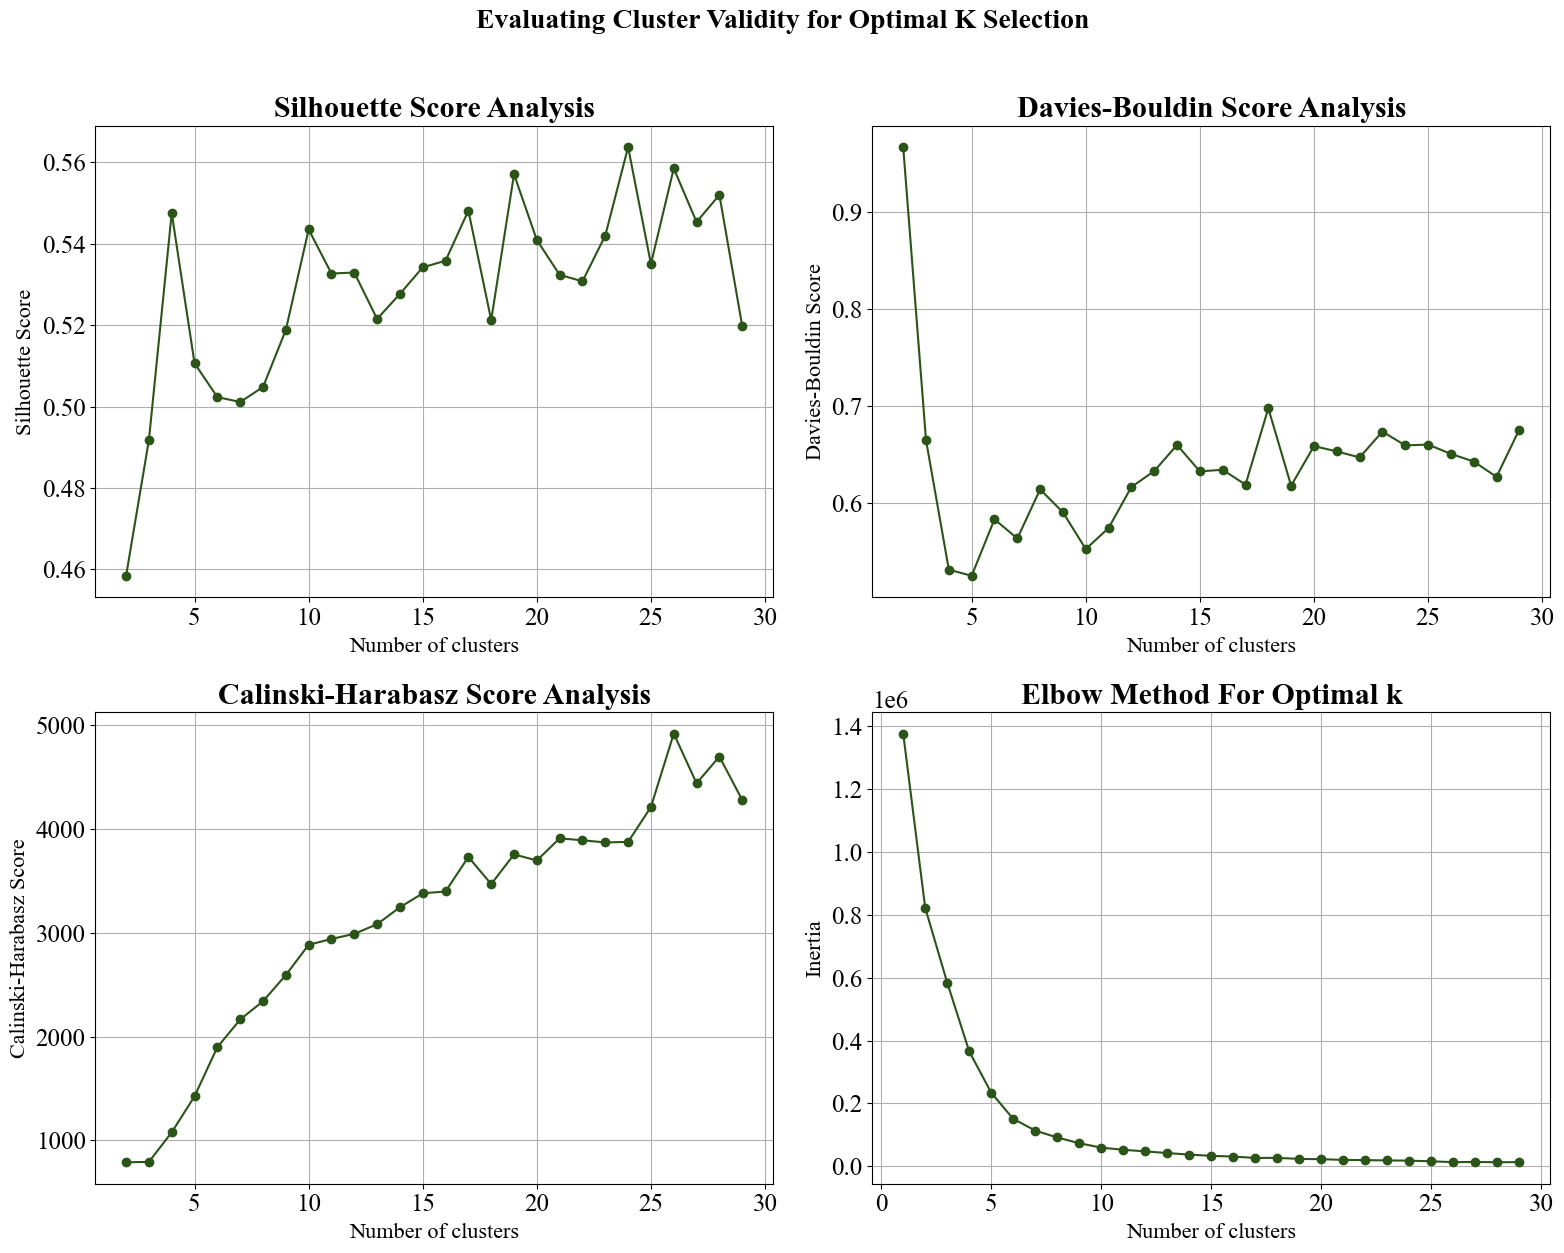

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  


plt.rcParams.update({'font.size': 18})


axes[0, 0].plot(range(2, 30), silhouette_scores, marker='o', color='#2a5418')
axes[0, 0].set_title('Silhouette Score Analysis', fontweight='bold')
axes[0, 0].set_xlabel('Number of clusters', fontsize=16)
axes[0, 0].set_ylabel('Silhouette Score', fontsize=16)
axes[0, 0].grid(True)


axes[0, 1].plot(range(2, 30), davies_bouldin_scores, marker='o', color='#2a5418')
axes[0, 1].set_title('Davies-Bouldin Score Analysis', fontweight='bold')
axes[0, 1].set_xlabel('Number of clusters', fontsize=16)
axes[0, 1].set_ylabel('Davies-Bouldin Score', fontsize=16)
axes[0, 1].grid(True)


axes[1, 0].plot(range(2, 30), calinski_harabasz_scores, marker='o', color='#2a5418')
axes[1, 0].set_title('Calinski-Harabasz Score Analysis', fontweight='bold')
axes[1, 0].set_xlabel('Number of clusters', fontsize=16)
axes[1, 0].set_ylabel('Calinski-Harabasz Score', fontsize=16)
axes[1, 0].grid(True)


axes[1, 1].plot(range(1, 30), inertias, marker='o', color='#2a5418')
axes[1, 1].set_title('Elbow Method For Optimal k', fontweight='bold')
axes[1, 1].set_xlabel('Number of clusters', fontsize=16)
axes[1, 1].set_ylabel('Inertia', fontsize=16)
axes[1, 1].grid(True)

plt.tight_layout()
fig.suptitle('Evaluating Cluster Validity for Optimal K Selection', fontsize=20, y=1.05, fontweight='bold')
plt.show()

Silhouette Score: 0.5106
davies_bouldin_score: 0.5249
calinski_harabasz_score:1424.8232


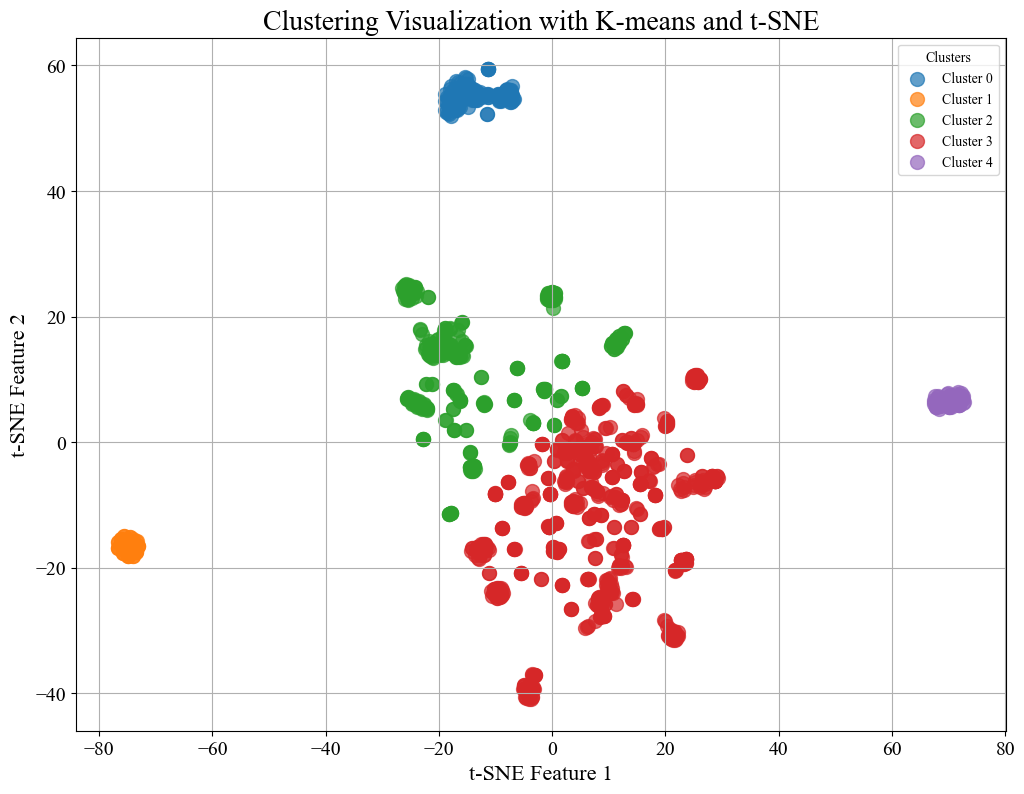

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42, init='random', algorithm='elkan')
kmeans_clusters = kmeans.fit_predict(tsne_results)


kmeans_silhouette = silhouette_score(tsne_results, kmeans_clusters)
kmeans_dbs = davies_bouldin_score(tsne_results, kmeans_clusters)
kmeans_chs = calinski_harabasz_score(tsne_results, kmeans_clusters)

print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"davies_bouldin_score: {kmeans_dbs:.4f}")
print(f"calinski_harabasz_score:{kmeans_chs:.4f}")


plt.figure(figsize=(12, 9))
unique_clusters = np.unique(kmeans_clusters)

for cluster in unique_clusters:
    cluster_subset = tsne_results[kmeans_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
    
    

plt.title('Clustering Visualization with K-means and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [30]:
kmeans.fit(tsne_results).cluster_centers_ 

array([[ 10.512732,  -8.622172],
       [-74.888824, -16.58197 ],
       [-16.331078,  29.10004 ]], dtype=float32)

In [47]:
clustering_results_df = clustering_results_df.drop([0], axis=0)

kmeans_data = {
    'algorithm': 'KMeans',
    'number_of_clusters': 5,
    'Silhouette_Score': kmeans_silhouette,
    'davies_bouldin_score': kmeans_dbs,
    'calinski_harabasz_score': kmeans_chs
}

# Append the new data as a row to the DataFrame
clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([kmeans_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.51065,0.524885,1424.82319


In [45]:
unique, counts = np.unique(kmeans_clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print(cluster_counts)

{0: 113, 1: 50, 2: 299, 3: 655, 4: 54}


Silhouette_Score: 0.2162
davies_bouldin_score: 0.4721
calinski_harabasz_score:631.3912


C:\Users\saeed\AppData\Local\Temp\ipykernel_9184\3127413038.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', cmap='viridis', s=100, alpha=0.7)


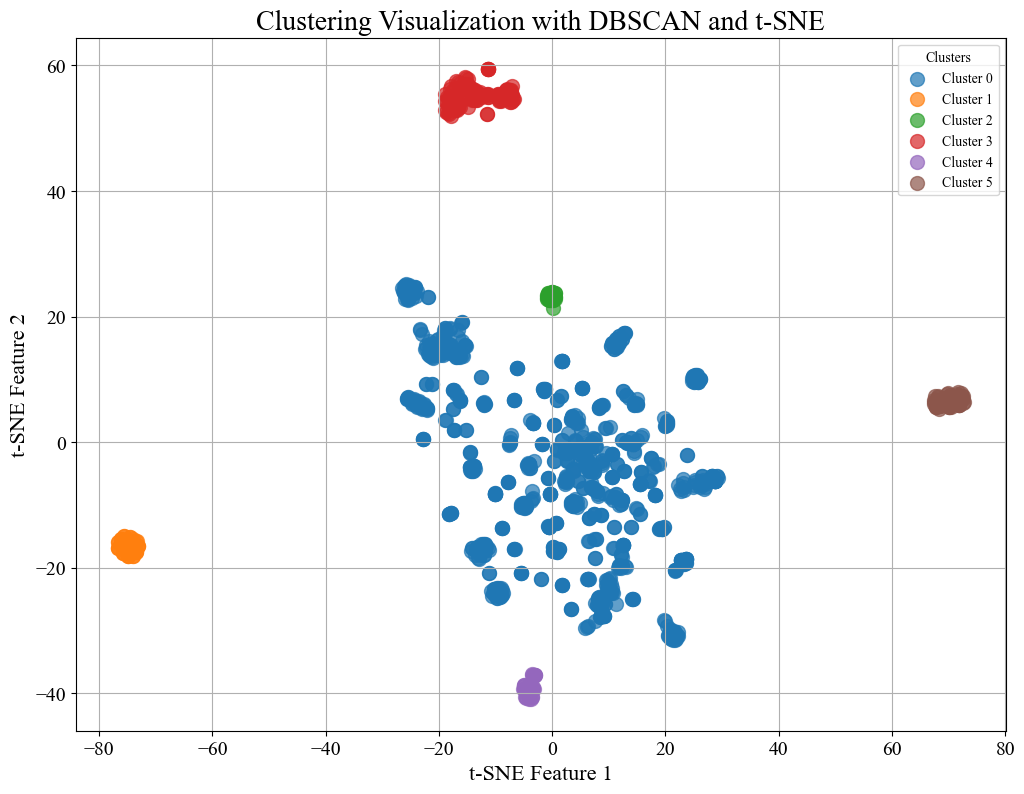

In [24]:
dbscacn = DBSCAN(eps=8, min_samples=10, metric='euclidean',
                metric_params=None, algorithm='auto', leaf_size=80, p=None, n_jobs=None)
DBSCAN_clusters = dbscacn.fit_predict(tsne_results)


DBSCAN_silhouette = silhouette_score(tsne_results, DBSCAN_clusters)
DBSCAN_dbs = davies_bouldin_score(tsne_results, DBSCAN_clusters)
DBSCAN_chs = calinski_harabasz_score(tsne_results, DBSCAN_clusters)

print(f"Silhouette_Score: {DBSCAN_silhouette:.4f}")
print(f"davies_bouldin_score: {DBSCAN_dbs:.4f}")
print(f"calinski_harabasz_score:{DBSCAN_chs:.4f}")



plt.figure(figsize=(12, 9))
unique_clusters = np.unique(DBSCAN_clusters)

for cluster in unique_clusters:
    cluster_subset = tsne_results[DBSCAN_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', cmap='viridis', s=100, alpha=0.7)

plt.title('Clustering Visualization with DBSCAN and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [49]:
DBSCAN_data = {
    'algorithm': 'DBSCAN',
    'number_of_clusters': 6,
    'Silhouette_Score': DBSCAN_silhouette,
    'davies_bouldin_score': DBSCAN_dbs,
    'calinski_harabasz_score': DBSCAN_chs
}

clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([DBSCAN_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152


Converged after 636 iterations.
Silhouette_Score: 0.5526
davies_bouldin_score: 0.5775
calinski_harabasz_score:4331.4040


C:\Users\saeed\AppData\Local\Temp\ipykernel_9184\1243554660.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', cmap='viridis', s=100, alpha=0.7)


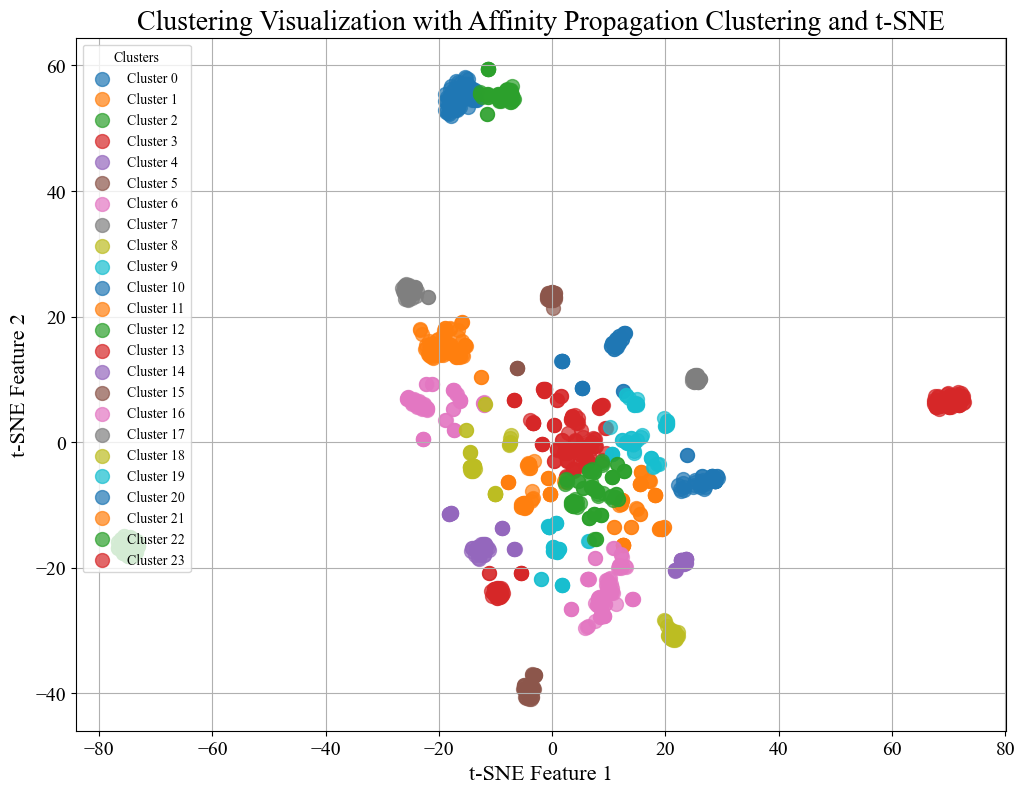

In [25]:
from sklearn.cluster import AffinityPropagation

AffinityPropagation = AffinityPropagation(damping=.99, max_iter=1000, convergence_iter=80,
                                          verbose=True, random_state=42)
AffinityPropagation_clusters = AffinityPropagation.fit_predict(tsne_results)


# Silhouette Score
AffinityPropagation_silhouette = silhouette_score(tsne_results, AffinityPropagation_clusters)
AffinityPropagation_dbs = davies_bouldin_score(tsne_results, AffinityPropagation_clusters)
AffinityPropagation_chs = calinski_harabasz_score(tsne_results, AffinityPropagation_clusters)

print(f"Silhouette_Score: {AffinityPropagation_silhouette:.4f}")
print(f"davies_bouldin_score: {AffinityPropagation_dbs:.4f}")
print(f"calinski_harabasz_score:{AffinityPropagation_chs:.4f}")



plt.figure(figsize=(12, 9))
unique_clusters = np.unique(AffinityPropagation_clusters)


for cluster in unique_clusters:
    cluster_subset = tsne_results[AffinityPropagation_clusters == cluster]

    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', cmap='viridis', s=100, alpha=0.7)

plt.title('Clustering Visualization with Affinity Propagation Clustering and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [55]:
AffinityPropagation_data = {
    'algorithm': 'AffinityPropagation',
    'number_of_clusters': 24,
    'Silhouette_Score': AffinityPropagation_silhouette,
    'davies_bouldin_score': AffinityPropagation_dbs,
    'calinski_harabasz_score': AffinityPropagation_chs
}

clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([AffinityPropagation_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011


Silhouette_Score: 0.5638
davies_bouldin_score: 0.4048
calinski_harabasz_score:922.5215


C:\Users\saeed\AppData\Local\Temp\ipykernel_9184\4072111641.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', cmap='viridis', s=100, alpha=0.7)


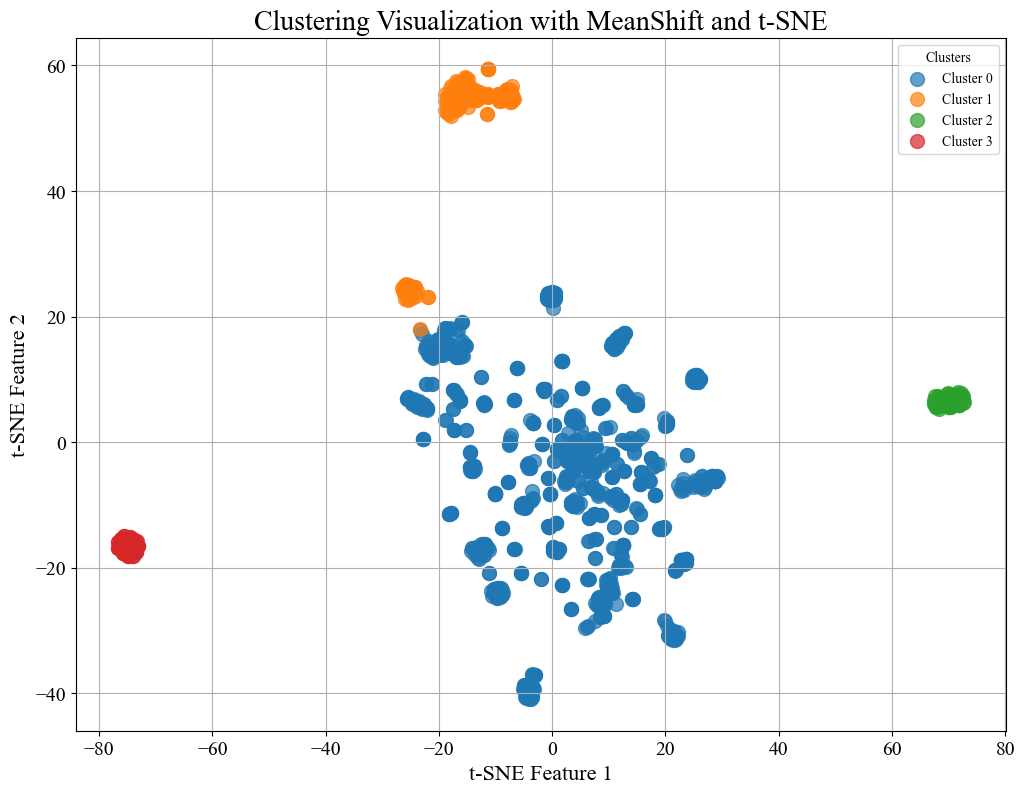

In [26]:
from sklearn.cluster import MeanShift

MeanShift = MeanShift()
MeanShift_clusters = MeanShift.fit_predict(tsne_results)

MeanShift_silhouette = silhouette_score(tsne_results, MeanShift_clusters)
MeanShift_dbs = davies_bouldin_score(tsne_results, MeanShift_clusters)
MeanShift_chs = calinski_harabasz_score(tsne_results, MeanShift_clusters)

print(f"Silhouette_Score: {MeanShift_silhouette:.4f}")
print(f"davies_bouldin_score: {MeanShift_dbs:.4f}")
print(f"calinski_harabasz_score:{MeanShift_chs:.4f}")

plt.figure(figsize=(12, 9))
unique_clusters = np.unique(MeanShift_clusters)

for cluster in unique_clusters:
    cluster_subset = tsne_results[MeanShift_clusters == cluster]
    
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', cmap='viridis', s=100, alpha=0.7)

plt.title('Clustering Visualization with MeanShift and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [161]:
unique, counts = np.unique(MeanShift_clusters, return_counts=True)
meanshift_cluster_counts = dict(zip(unique, counts))
print(meanshift_cluster_counts)

{0: 920, 1: 147, 2: 54, 3: 50}


In [58]:
MeanShift_data = {
    'algorithm': 'MeanShift',
    'number_of_clusters': 4,
    'Silhouette_Score': MeanShift_silhouette,
    'davies_bouldin_score': MeanShift_dbs,
    'calinski_harabasz_score': MeanShift_chs
}

clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([MeanShift_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011
3,MeanShift,4,0.563753,0.404779,922.521490


C:\Users\saeed\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\saeed\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:411: UserWarning: Exited at iteration 695 with accuracies 
[1.90631781e-15 6.58748388e-06 1.02683015e-05 2.48037605e-05
 1.12544867e-05 1.61443158e-05]
not reaching the requested tolerance 1.7449259757995605e-05.
Use iteration 695 instead with accuracy 
1.1509724729774046e-05.

  _, diffusion_map = lobpcg(
C:\Users\saeed\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:411: UserWarning: Exited postprocessing with accuracies 
[3.24837809e-15 6.58748377e-06 1.02683012e-05 2.48037605e-05
 1.12544871e-05 1.61443157e-05]
not reaching the requested tolerance 1.7449259757995605e-05.
  _, diffusion_map = lobpcg(


Silhouette_Score: -0.3845
davies_bouldin_score: 2.7918
calinski_harabasz_score:33.2558


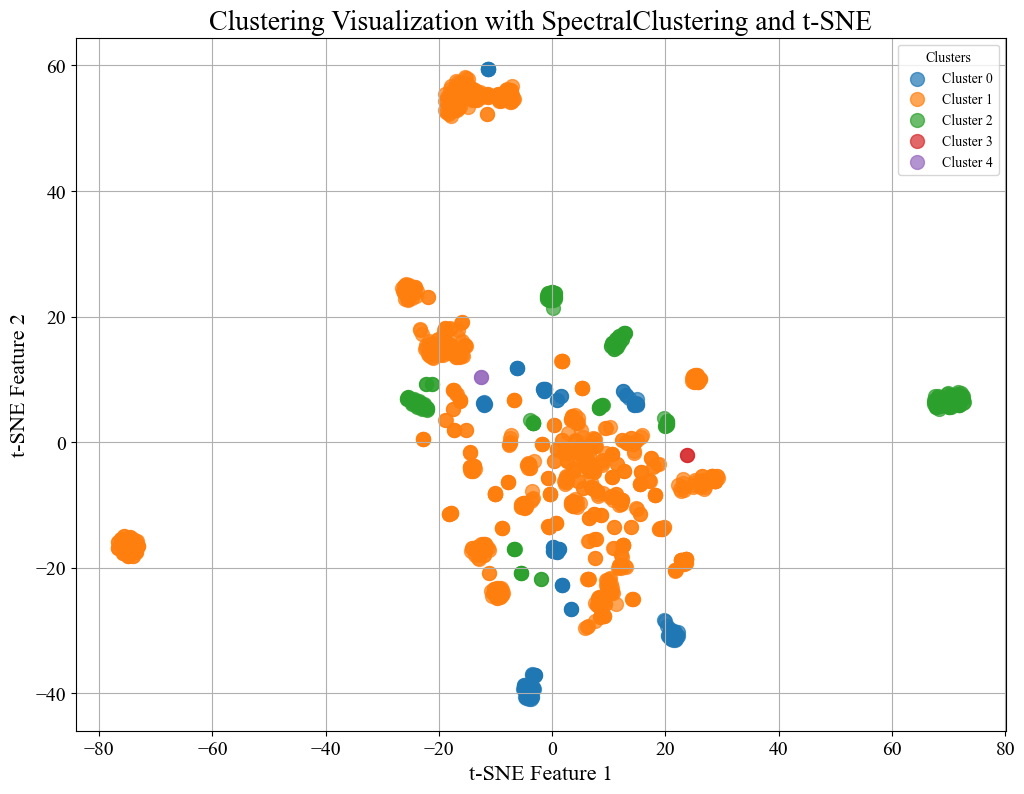

In [27]:
from sklearn.cluster import SpectralClustering

SpectralClustering = SpectralClustering(n_clusters=5)

SpectralClustering_clusters = SpectralClustering.fit_predict(tsne_results)


SpectralClustering_silhouette = silhouette_score(tsne_results, SpectralClustering_clusters)
SpectralClustering_dbs = davies_bouldin_score(tsne_results, SpectralClustering_clusters)
SpectralClustering_chs = calinski_harabasz_score(tsne_results, SpectralClustering_clusters)

print(f"Silhouette_Score: {SpectralClustering_silhouette:.4f}")
print(f"davies_bouldin_score: {SpectralClustering_dbs:.4f}")
print(f"calinski_harabasz_score:{SpectralClustering_chs:.4f}")


plt.figure(figsize=(12, 9))
unique_clusters = np.unique(SpectralClustering_clusters)


for cluster in unique_clusters:
    cluster_subset = tsne_results[SpectralClustering_clusters == cluster]
    
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)

plt.title('Clustering Visualization with SpectralClustering and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [61]:
SpectralClustering_data = {
    'algorithm': 'SpectralClustering',
    'number_of_clusters': 5,
    'Silhouette_Score': SpectralClustering_silhouette,
    'davies_bouldin_score': SpectralClustering_dbs,
    'calinski_harabasz_score': SpectralClustering_chs
}

clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([SpectralClustering_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011
3,MeanShift,4,0.563753,0.404779,922.521490
4,SpectralClustering,5,-0.130924,3.847677,85.173775


Silhouette_Score: 0.5115
davies_bouldin_score: 0.4157
calinski_harabasz_score:1218.9738


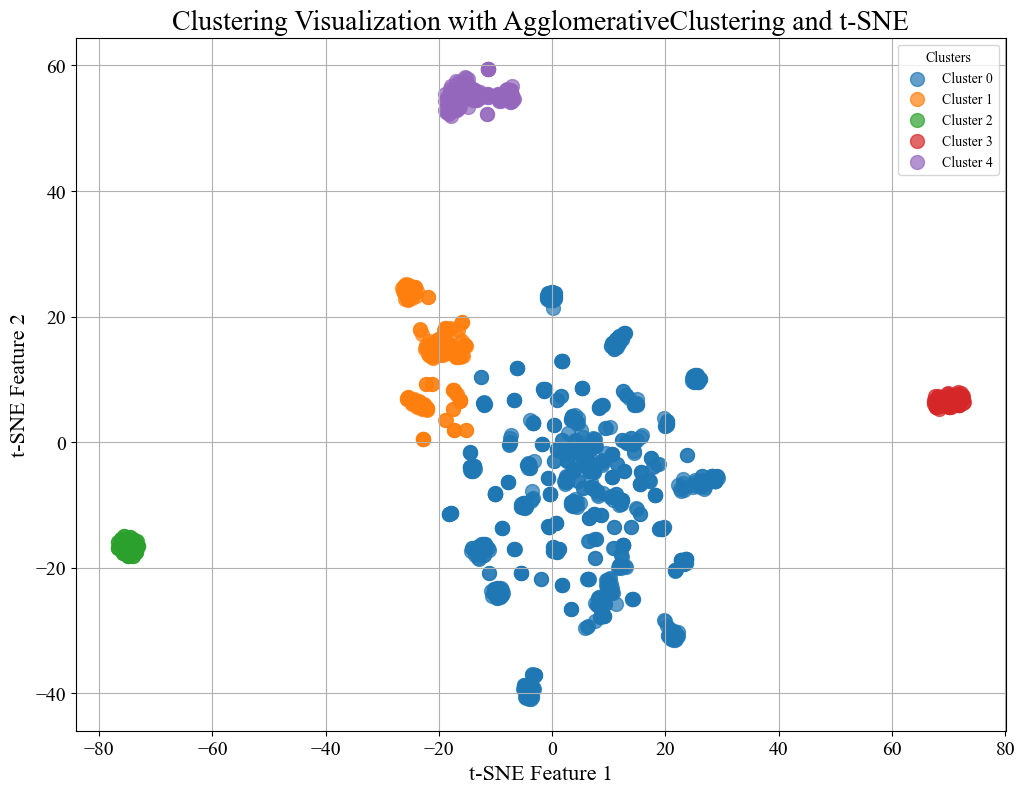

In [28]:
from sklearn.cluster import AgglomerativeClustering

AgglomerativeClustering = AgglomerativeClustering(n_clusters=5)
AgglomerativeClustering_clusters = AgglomerativeClustering.fit_predict(tsne_results)


AgglomerativeClustering_silhouette = silhouette_score(tsne_results, AgglomerativeClustering_clusters)
AgglomerativeClustering_dbs = davies_bouldin_score(tsne_results, AgglomerativeClustering_clusters)
AgglomerativeClustering_chs = calinski_harabasz_score(tsne_results, AgglomerativeClustering_clusters)

print(f"Silhouette_Score: {AgglomerativeClustering_silhouette:.4f}")
print(f"davies_bouldin_score: {AgglomerativeClustering_dbs:.4f}")
print(f"calinski_harabasz_score:{AgglomerativeClustering_chs:.4f}")

plt.figure(figsize=(12, 9))
unique_clusters = np.unique(AgglomerativeClustering_clusters)


for cluster in unique_clusters:
    cluster_subset = tsne_results[AgglomerativeClustering_clusters == cluster]

    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)

plt.title('Clustering Visualization with AgglomerativeClustering and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [67]:
AgglomerativeClustering_data = {
    'algorithm': 'AgglomerativeClustering',
    'number_of_clusters': 5,
    'Silhouette_Score': AgglomerativeClustering_silhouette,
    'davies_bouldin_score': AgglomerativeClustering_dbs,
    'calinski_harabasz_score': AgglomerativeClustering_chs
}

clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([AgglomerativeClustering_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011
3,MeanShift,4,0.563753,0.404779,922.521490
4,SpectralClustering,5,-0.130924,3.847677,85.173775
5,AgglomerativeClustering,5,0.511478,0.415669,1218.973789


Silhouette_Score: 0.4224
davies_bouldin_score: 0.7081
calinski_harabasz_score:1155.9571


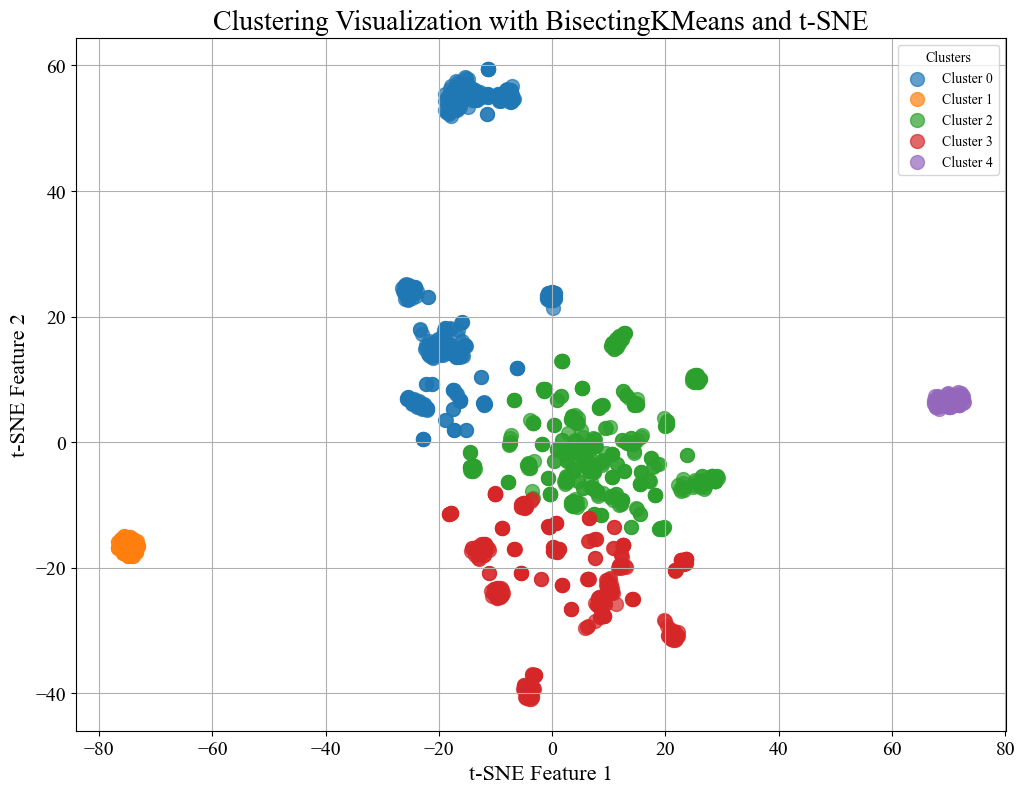

In [29]:
from sklearn.cluster import BisectingKMeans

BisectingKMeans = BisectingKMeans(n_clusters=5, random_state=42)
BisectingKMeans_clusters = BisectingKMeans.fit_predict(tsne_results)


# Silhouette Score
BisectingKMeans_silhouette = silhouette_score(tsne_results, BisectingKMeans_clusters)
BisectingKMeans_dbs = davies_bouldin_score(tsne_results, BisectingKMeans_clusters)
BisectingKMeans_chs = calinski_harabasz_score(tsne_results, BisectingKMeans_clusters)

print(f"Silhouette_Score: {BisectingKMeans_silhouette:.4f}")
print(f"davies_bouldin_score: {BisectingKMeans_dbs:.4f}")
print(f"calinski_harabasz_score:{BisectingKMeans_chs:.4f}")

plt.figure(figsize=(12, 9))
unique_clusters = np.unique(BisectingKMeans_clusters)


for cluster in unique_clusters:
    cluster_subset = tsne_results[BisectingKMeans_clusters == cluster]
    
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)

plt.title('Clustering Visualization with BisectingKMeans and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [132]:
clustering_results_df = clustering_results_df.drop([6],axis=0)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011
3,MeanShift,4,0.563753,0.404779,922.521490
4,SpectralClustering,5,-0.130924,3.847677,85.173775
5,AgglomerativeClustering,5,0.511478,0.415669,1218.973789
7,BisectingKMeans,5,0.422352,0.708148,1155.957105
8,HDBSCAN,19,0.275576,0.949580,367.337786
9,OPTICS,6,0.304074,0.598541,1089.539339
10,Birch,5,0.515042,0.419016,1244.863255


In [85]:
BisectingKMeans_data = {
    'algorithm': 'BisectingKMeans',
    'number_of_clusters': 5,
    'Silhouette_Score': BisectingKMeans_silhouette,
    'davies_bouldin_score': BisectingKMeans_dbs,
    'calinski_harabasz_score': BisectingKMeans_chs
}

clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([BisectingKMeans_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011
3,MeanShift,4,0.563753,0.404779,922.521490
4,SpectralClustering,5,-0.130924,3.847677,85.173775
5,AgglomerativeClustering,5,0.511478,0.415669,1218.973789
6,BisectingKMeans,4,0.545543,0.537737,1074.719615
7,BisectingKMeans,5,0.422352,0.708148,1155.957105


Silhouette_Score: 0.4224
davies_bouldin_score: 0.7081
calinski_harabasz_score:1155.9571


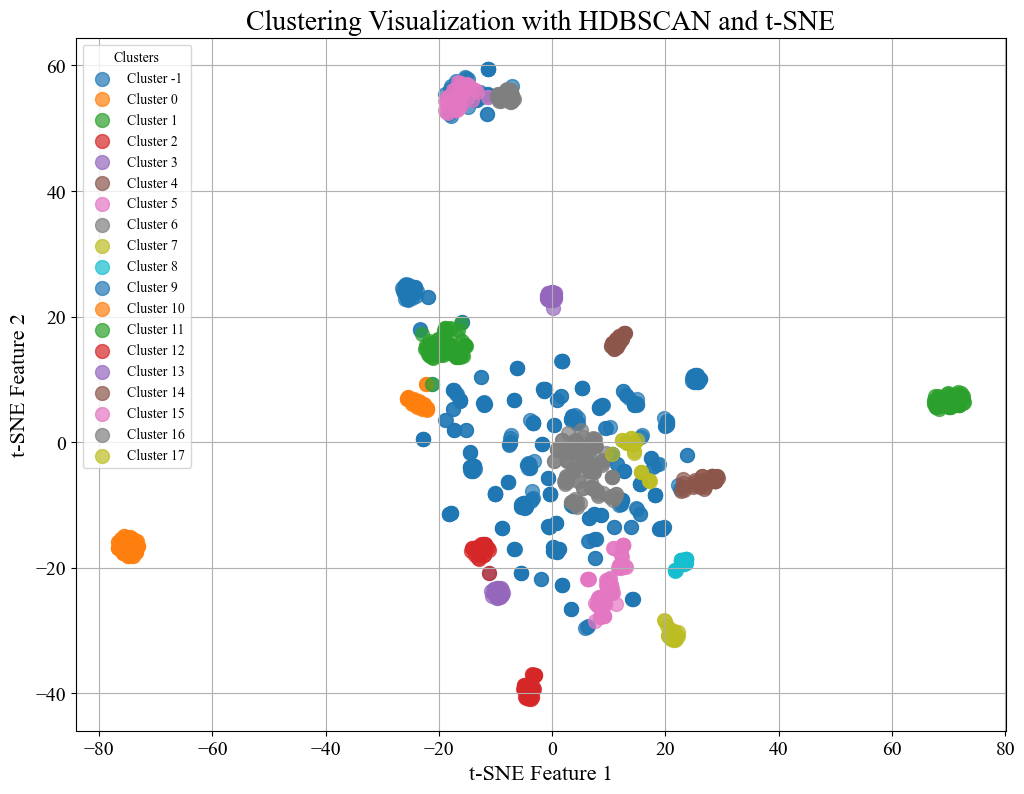

In [30]:
from sklearn.cluster import HDBSCAN

HDBSCAN = HDBSCAN(min_cluster_size=20, min_samples=20, cluster_selection_epsilon=0, 
                  max_cluster_size=None, metric='euclidean', metric_params=None, alpha=1.0, 
                  algorithm='brute', leaf_size=40, n_jobs=None, cluster_selection_method='leaf', 
                  allow_single_cluster=False, store_centers=None, copy=False)

HDBSCAN_clusters = HDBSCAN.fit_predict(tsne_results)


HDBSCAN_silhouette = silhouette_score(tsne_results, HDBSCAN_clusters)
HDBSCAN_dbs = davies_bouldin_score(tsne_results, HDBSCAN_clusters)
HDBSCAN_chs = calinski_harabasz_score(tsne_results, HDBSCAN_clusters)

print(f"Silhouette_Score: {BisectingKMeans_silhouette:.4f}")
print(f"davies_bouldin_score: {BisectingKMeans_dbs:.4f}")
print(f"calinski_harabasz_score:{BisectingKMeans_chs:.4f}")

plt.figure(figsize=(12, 9))
unique_clusters = np.unique(HDBSCAN_clusters)


for cluster in unique_clusters:
    cluster_subset = tsne_results[HDBSCAN_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)

plt.title('Clustering Visualization with HDBSCAN and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [97]:
HDBSCAN_data = {
    'algorithm': 'HDBSCAN',
    'number_of_clusters': 19,
    'Silhouette_Score': HDBSCAN_silhouette,
    'davies_bouldin_score': HDBSCAN_dbs,
    'calinski_harabasz_score': HDBSCAN_chs
}

clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([HDBSCAN_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011
3,MeanShift,4,0.563753,0.404779,922.521490
4,SpectralClustering,5,-0.130924,3.847677,85.173775
5,AgglomerativeClustering,5,0.511478,0.415669,1218.973789
6,BisectingKMeans,4,0.545543,0.537737,1074.719615
7,BisectingKMeans,5,0.422352,0.708148,1155.957105
8,HDBSCAN,19,0.275576,0.949580,367.337786


Silhouette_Score: 0.3041
davies_bouldin_score: 0.5985
calinski_harabasz_score:1089.5393


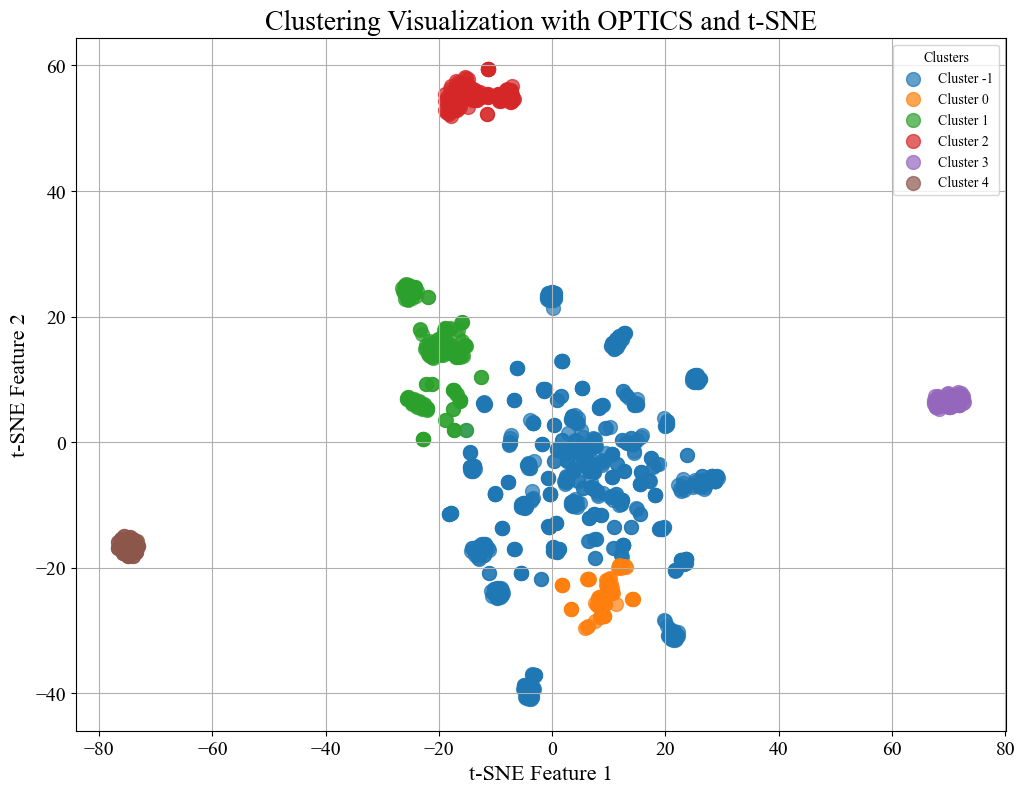

In [31]:
from sklearn.cluster import OPTICS

OPTICS = OPTICS(min_samples=50, metric='minkowski', p=2, metric_params=None, 
                cluster_method='xi', eps=None, xi=0.05, predecessor_correction=True, 
                min_cluster_size=None, algorithm='auto', leaf_size=30, memory=None,
                n_jobs=None)

OPTICS_clusters = OPTICS.fit_predict(tsne_results)


OPTICS_silhouette = silhouette_score(tsne_results, OPTICS_clusters)
OPTICS_dbs = davies_bouldin_score(tsne_results, OPTICS_clusters)
OPTICS_chs = calinski_harabasz_score(tsne_results, OPTICS_clusters)

print(f"Silhouette_Score: {OPTICS_silhouette:.4f}")
print(f"davies_bouldin_score: {OPTICS_dbs:.4f}")
print(f"calinski_harabasz_score:{OPTICS_chs:.4f}")

plt.figure(figsize=(12, 9))
unique_clusters = np.unique(OPTICS_clusters)


for cluster in unique_clusters:
    cluster_subset = tsne_results[OPTICS_clusters == cluster]
    
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)

plt.title('Clustering Visualization with OPTICS and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [111]:
clustering_results_df = clustering_results_df.drop([9], axis=0)

OPTICS_data = {
    'algorithm': 'OPTICS',
    'number_of_clusters': 6,
    'Silhouette_Score': OPTICS_silhouette,
    'davies_bouldin_score': OPTICS_dbs,
    'calinski_harabasz_score': OPTICS_chs
}

clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([OPTICS_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011
3,MeanShift,4,0.563753,0.404779,922.521490
4,SpectralClustering,5,-0.130924,3.847677,85.173775
5,AgglomerativeClustering,5,0.511478,0.415669,1218.973789
6,BisectingKMeans,4,0.545543,0.537737,1074.719615
7,BisectingKMeans,5,0.422352,0.708148,1155.957105
8,HDBSCAN,19,0.275576,0.949580,367.337786
9,OPTICS,6,0.304074,0.598541,1089.539339


Silhouette_Score: 0.5150
davies_bouldin_score: 0.4190
calinski_harabasz_score:1244.8633


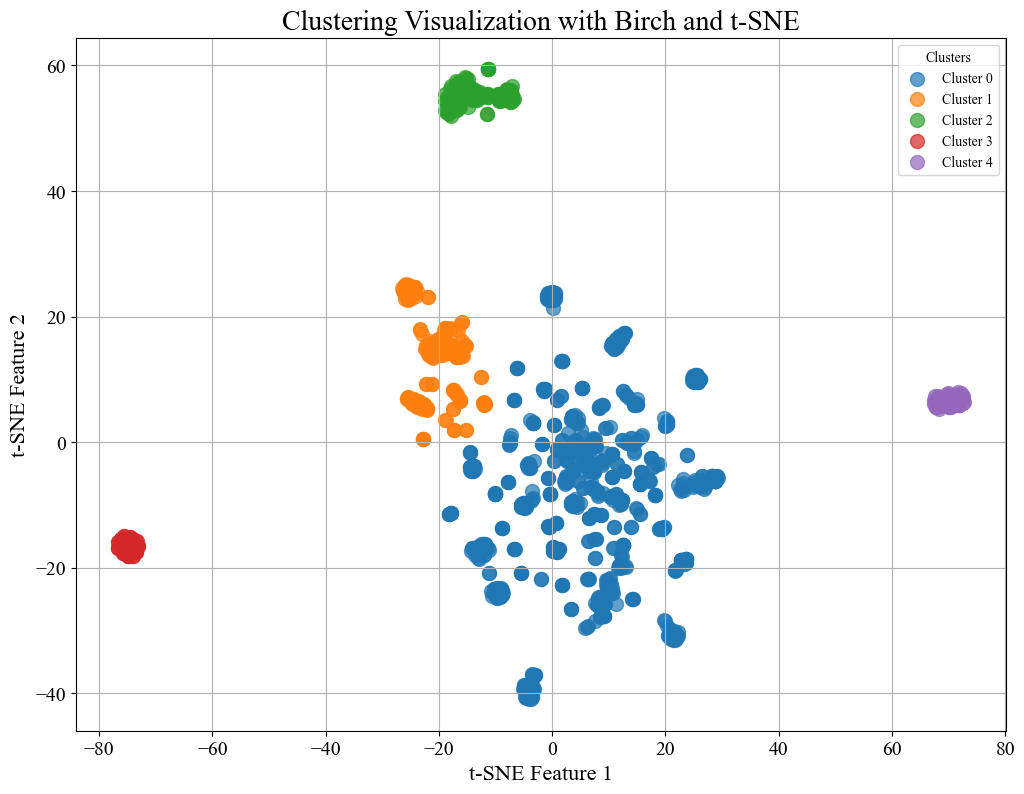

In [32]:
from sklearn.cluster import Birch

Birch = Birch(n_clusters=5)
Birch_clusters = Birch.fit_predict(tsne_results)


# Silhouette Score
Birch_silhouette = silhouette_score(tsne_results, Birch_clusters)
Birch_dbs = davies_bouldin_score(tsne_results, Birch_clusters)
Birch_chs = calinski_harabasz_score(tsne_results, Birch_clusters)

print(f"Silhouette_Score: {Birch_silhouette:.4f}")
print(f"davies_bouldin_score: {Birch_dbs:.4f}")
print(f"calinski_harabasz_score:{Birch_chs:.4f}")

plt.figure(figsize=(12, 9))
unique_clusters = np.unique(Birch_clusters)


for cluster in unique_clusters:
    cluster_subset = tsne_results[Birch_clusters == cluster]

    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)

plt.title('Clustering Visualization with Birch and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [120]:
Birch_data = {
    'algorithm': 'Birch',
    'number_of_clusters': 5,
    'Silhouette_Score': Birch_silhouette,
    'davies_bouldin_score': Birch_dbs,
    'calinski_harabasz_score': Birch_chs
}

clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([Birch_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011
3,MeanShift,4,0.563753,0.404779,922.521490
4,SpectralClustering,5,-0.130924,3.847677,85.173775
5,AgglomerativeClustering,5,0.511478,0.415669,1218.973789
6,BisectingKMeans,4,0.545543,0.537737,1074.719615
7,BisectingKMeans,5,0.422352,0.708148,1155.957105
8,HDBSCAN,19,0.275576,0.949580,367.337786
9,OPTICS,6,0.304074,0.598541,1089.539339


C:\Users\saeed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1280 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Silhouette_Score: 0.4161
davies_bouldin_score: 0.6596
calinski_harabasz_score:1240.7216


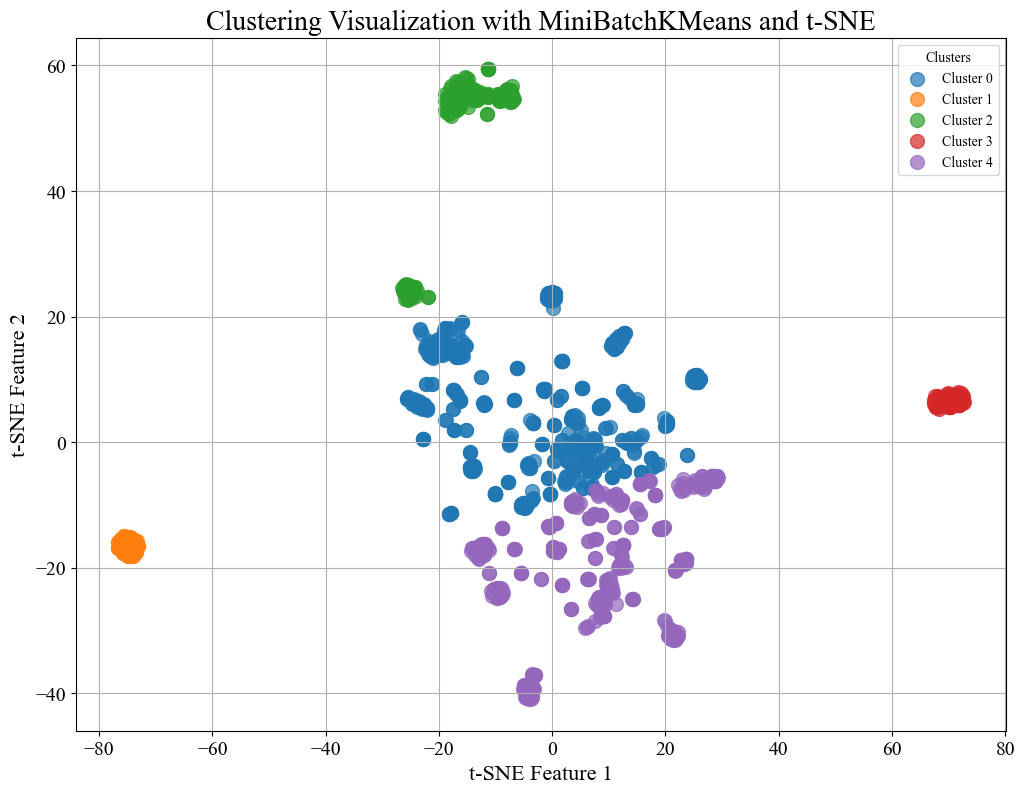

In [33]:
from sklearn.cluster import MiniBatchKMeans

MiniBatchKMeans = MiniBatchKMeans(n_clusters=5, random_state=42 ,batch_size=1024)
MiniBatchKMeans_clusters = MiniBatchKMeans.fit_predict(tsne_results)


MiniBatchKMeans_silhouette = silhouette_score(tsne_results, MiniBatchKMeans_clusters)
MiniBatchKMeans_dbs = davies_bouldin_score(tsne_results, MiniBatchKMeans_clusters)
MiniBatchKMeans_chs = calinski_harabasz_score(tsne_results, MiniBatchKMeans_clusters)

print(f"Silhouette_Score: {MiniBatchKMeans_silhouette:.4f}")
print(f"davies_bouldin_score: {MiniBatchKMeans_dbs:.4f}")
print(f"calinski_harabasz_score:{MiniBatchKMeans_chs:.4f}")

plt.figure(figsize=(12, 9))
unique_clusters = np.unique(MiniBatchKMeans_clusters)


for cluster in unique_clusters:
    cluster_subset = tsne_results[MiniBatchKMeans_clusters == cluster]
    
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)

plt.title('Clustering Visualization with MiniBatchKMeans and t-SNE', fontsize=20)
plt.xlabel('t-SNE Feature 1', fontsize=16)
plt.ylabel('t-SNE Feature 2', fontsize=16)
plt.legend(title="Clusters")
plt.grid(True)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.show()

In [128]:
MiniBatchKMeans_data = {
    'algorithm': 'MiniBatchKMeans',
    'number_of_clusters': 5,
    'Silhouette_Score': MiniBatchKMeans_silhouette,
    'davies_bouldin_score': MiniBatchKMeans_dbs,
    'calinski_harabasz_score': MiniBatchKMeans_chs
}

clustering_results_df = pd.concat([clustering_results_df, pd.DataFrame([MiniBatchKMeans_data])], ignore_index=True)
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011
3,MeanShift,4,0.563753,0.404779,922.521490
4,SpectralClustering,5,-0.130924,3.847677,85.173775
5,AgglomerativeClustering,5,0.511478,0.415669,1218.973789
6,BisectingKMeans,4,0.545543,0.537737,1074.719615
7,BisectingKMeans,5,0.422352,0.708148,1155.957105
8,HDBSCAN,19,0.275576,0.949580,367.337786
9,OPTICS,6,0.304074,0.598541,1089.539339


In [134]:
clustering_results_df.to_excel('clustering_results_df.xlsx', index=False)

C:\Users\saeed\AppData\Local\Temp\ipykernel_23196\1247617676.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  clustering_results_df.to_excel('clustering_results_df.xlsx', index=False)


In [133]:
clustering_results_df

,algorithm,number_of_clusters,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
0,KMeans,5,0.510650,0.524885,1424.823190
1,DBSCAN,6,0.216181,0.472090,631.391152
2,AffinityPropagation,24,0.552614,0.577458,4331.404011
3,MeanShift,4,0.563753,0.404779,922.521490
4,SpectralClustering,5,-0.130924,3.847677,85.173775
5,AgglomerativeClustering,5,0.511478,0.415669,1218.973789
7,BisectingKMeans,5,0.422352,0.708148,1155.957105
8,HDBSCAN,19,0.275576,0.949580,367.337786
9,OPTICS,6,0.304074,0.598541,1089.539339
10,Birch,5,0.515042,0.419016,1244.863255


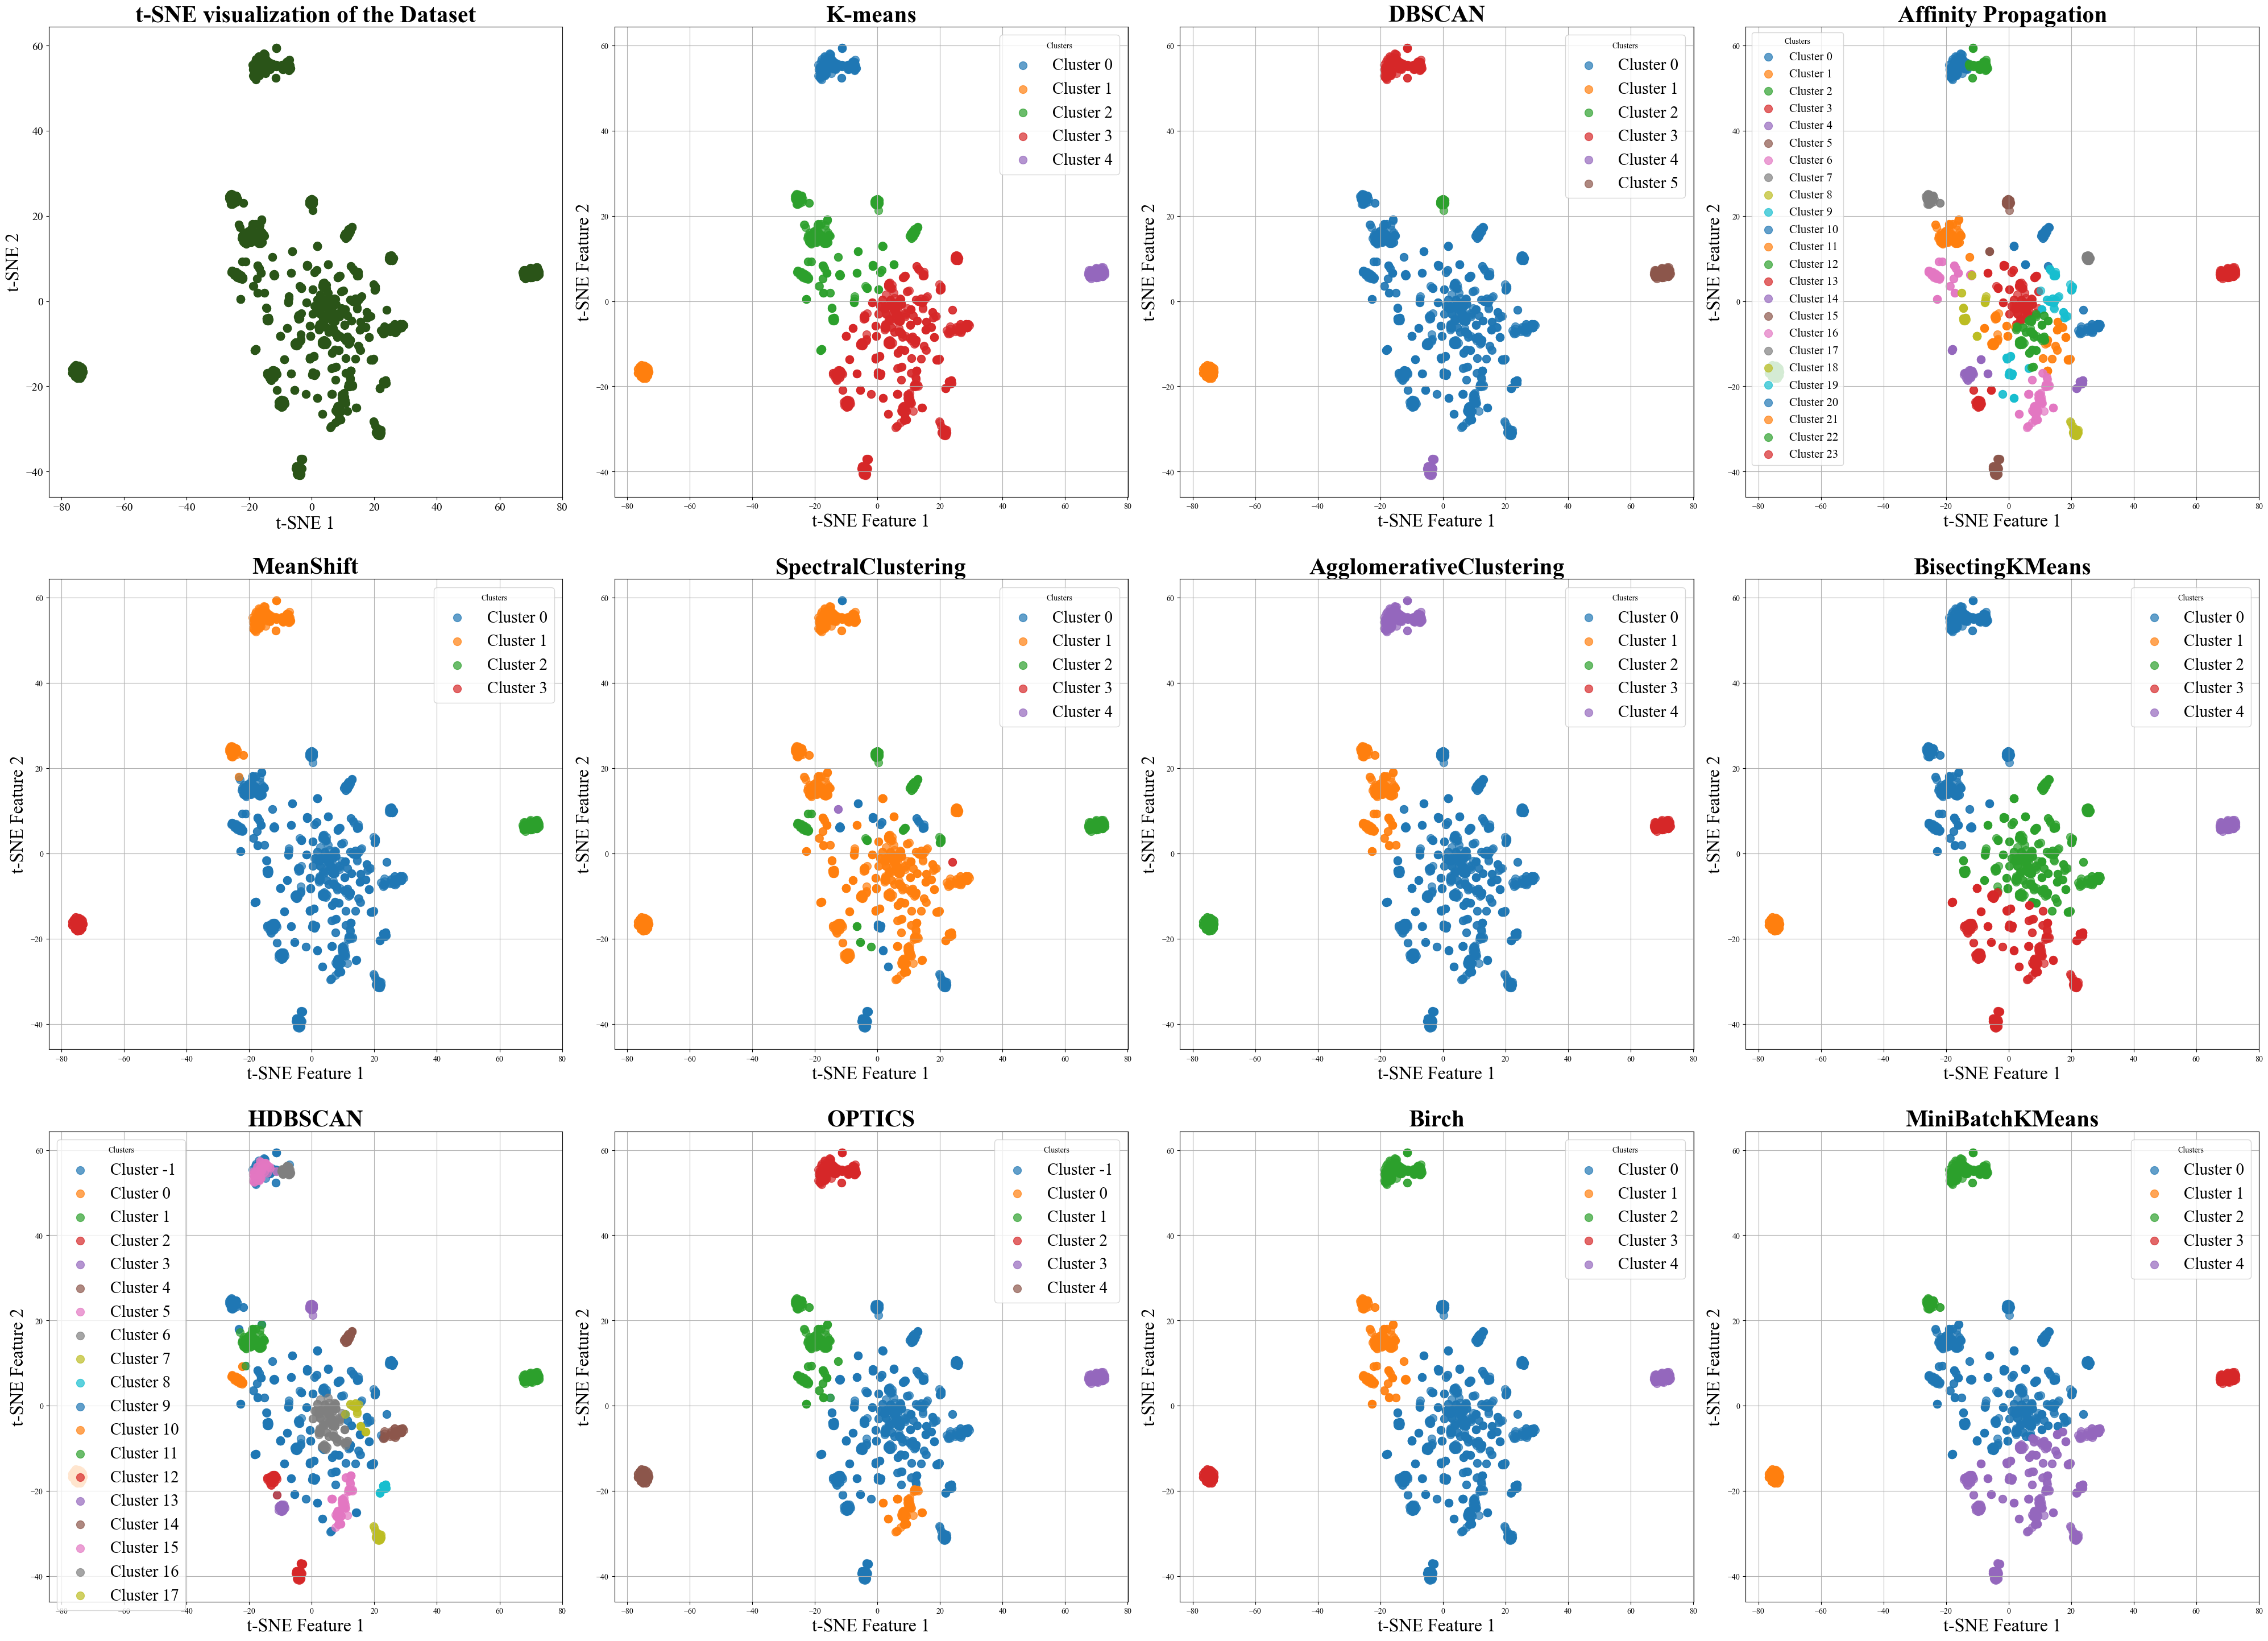

In [40]:
import matplotlib.pyplot as plt

# Assume tsne_results and the clusters from various algorithms are already defined

# Start the figure and define its size
fig = plt.figure(figsize=(40, 30))

# t-SNE visualization of the dataset
plt.subplot(3, 4, 1)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=100, color='#2a5418')
plt.title('t-SNE visualization of the Dataset', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE 1', fontsize=23)
plt.ylabel('t-SNE 2', fontsize=23)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# KMeans subplot
plt.subplot(3, 4, 2)
unique_clusters = np.unique(kmeans_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[kmeans_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('K-means', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=21)
plt.grid(True)

# DBSCAN subplot
plt.subplot(3, 4, 3)
unique_clusters = np.unique(DBSCAN_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[DBSCAN_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('DBSCAN', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=21)
plt.grid(True)

# Affinity Propagation subplot
plt.subplot(3, 4, 4)
unique_clusters = np.unique(AffinityPropagation_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[AffinityPropagation_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('Affinity Propagation', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=15)
plt.grid(True)

# MeanShift subplot
plt.subplot(3, 4, 5)
unique_clusters = np.unique(MeanShift_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[MeanShift_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('MeanShift', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=21)
plt.grid(True)

# SpectralClustering subplot
plt.subplot(3, 4, 6)
unique_clusters = np.unique(SpectralClustering_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[SpectralClustering_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('SpectralClustering', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=21)
plt.grid(True)

# AgglomerativeClustering subplot
plt.subplot(3, 4, 7)
unique_clusters = np.unique(AgglomerativeClustering_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[AgglomerativeClustering_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('AgglomerativeClustering', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=21)
plt.grid(True)

# BisectingKMeans subplot
plt.subplot(3, 4, 8)
unique_clusters = np.unique(BisectingKMeans_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[BisectingKMeans_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('BisectingKMeans', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=21)
plt.grid(True)

# HDBSCAN subplot
plt.subplot(3, 4, 9)
unique_clusters = np.unique(HDBSCAN_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[HDBSCAN_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('HDBSCAN', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=21)
plt.grid(True)

# OPTICS subplot
plt.subplot(3, 4, 10)
unique_clusters = np.unique(OPTICS_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[OPTICS_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('OPTICS', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=21)
plt.grid(True)

# Birch subplot
plt.subplot(3, 4, 11)
unique_clusters = np.unique(Birch_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[Birch_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('Birch', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=21)
plt.grid(True)

# MiniBatchKMeans subplot
plt.subplot(3, 4, 12)
unique_clusters = np.unique(MiniBatchKMeans_clusters)
for cluster in unique_clusters:
    cluster_subset = tsne_results[MiniBatchKMeans_clusters == cluster]
    plt.scatter(cluster_subset[:, 0], cluster_subset[:, 1], label=f'Cluster {cluster}', s=100, alpha=0.7)
plt.title('MiniBatchKMeans', fontsize=30, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=23)
plt.ylabel('t-SNE Feature 2', fontsize=23)
plt.legend(title="Clusters", fontsize=21)
plt.grid(True)

# Ensure the plots do not overlap and adjust the layout
plt.tight_layout()

# Display the figure
plt.show()


In [163]:
len(kmeans_clusters)

1171

In [165]:
cdf['clusters'] = kmeans_clusters

In [170]:
cdf.to_excel('DatasetWithClusters.xlsx', index=False)

C:\Users\saeed\AppData\Local\Temp\ipykernel_23196\2175407650.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  cdf.to_excel('DatasetWithClusters.xlsx', index=False)


In [187]:
clustering_labels = pd.DataFrame({
    'kmeans' : kmeans_clusters,
    'DBSCAN':DBSCAN_clusters,
    'AffinityPropagation':AffinityPropagation_clusters,
    'MeanShift':MeanShift_clusters,
    'SpectralClustering':SpectralClustering_clusters,
    'AgglomerativeClustering':AgglomerativeClustering_clusters,
    'BisectingKMeans':BisectingKMeans_clusters,
    'HDBSCAN':HDBSCAN_clusters,
    'OPTICS':OPTICS_clusters,
    'Birch':Birch_clusters,
    'MiniBatchKMeans':MiniBatchKMeans_clusters
    })

clustering_labels.to_excel('clustering_labels.xlsx', index=False)

C:\Users\saeed\AppData\Local\Temp\ipykernel_23196\3331405730.py:15: UserWarning:

Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).

